In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [5]:
data = pd.read_csv('./housing.csv')
data.info()
# No	属性	数据类型	字段描述x
# 1	CRIM	Float	城镇人均犯罪率
# 2	ZN	Float	占地面积超过2.5万平方英尺的住宅用地比例
# 3	INDUS	Float	城镇非零售业务地区的比例
# 4	CHAS	Integer	查尔斯河虚拟变量 (= 1 如果土地在河边；否则是0)
# 5	NOX	Float	一氧化氮浓度（每1000万份）
# 6	RM	Float	平均每居民房数
# 7	AGE	Float	在1940年之前建成的所有者占用单位的比例
# 8	DIS	Float	与五个波士顿就业中心的加权距离
# 9	RAD	Integer	辐射状公路的可达性指数
# 10	TAX	Float	每10,000美元的全额物业税率
# 11	PTRATIO	Float	城镇师生比例
# 12	B	Float	1000（Bk - 0.63）^ 2其中Bk是城镇黑人的比例
# 13	LSTAT	Float	人口中地位较低人群的百分数
# 14	MEDV	Float	（目标变量/类别属性）以1000美元计算的自有住房的中位数

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

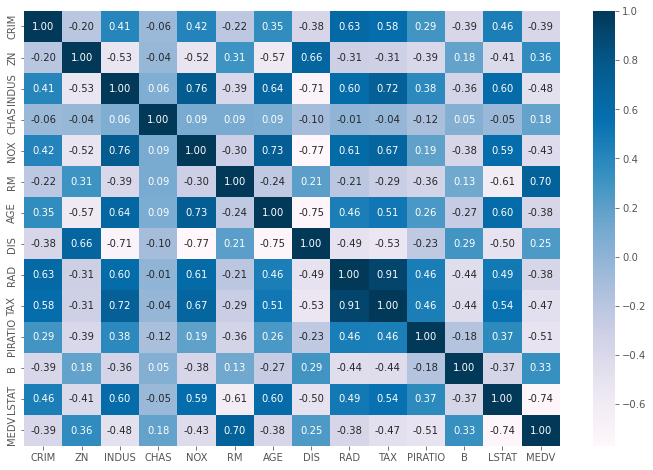

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='PuBu') # 相关性检验

<AxesSubplot:>

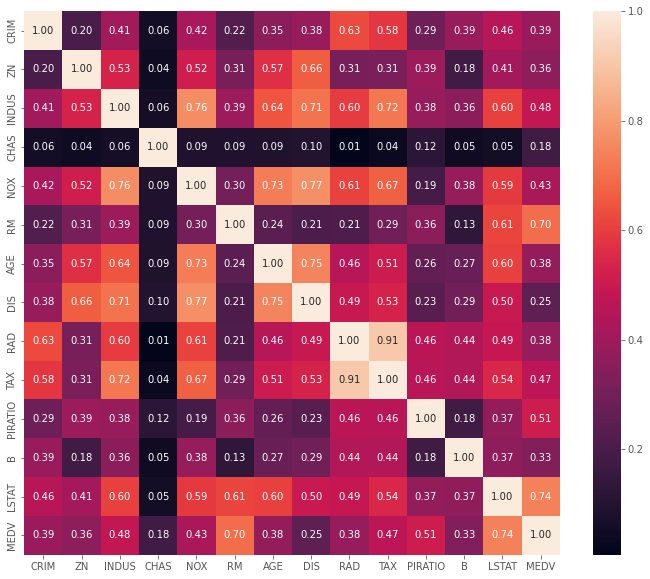

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().abs(),annot=True,fmt='.2f')

In [7]:
data.corr()['MEDV'].sort_values() # 相关性较小属性/共线性是什么意思？ 线性回归模型？

LSTAT     -0.737663
PIRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

time: 5.12 ms


In [8]:
data[data.columns.delete(-1)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


time: 15.3 ms


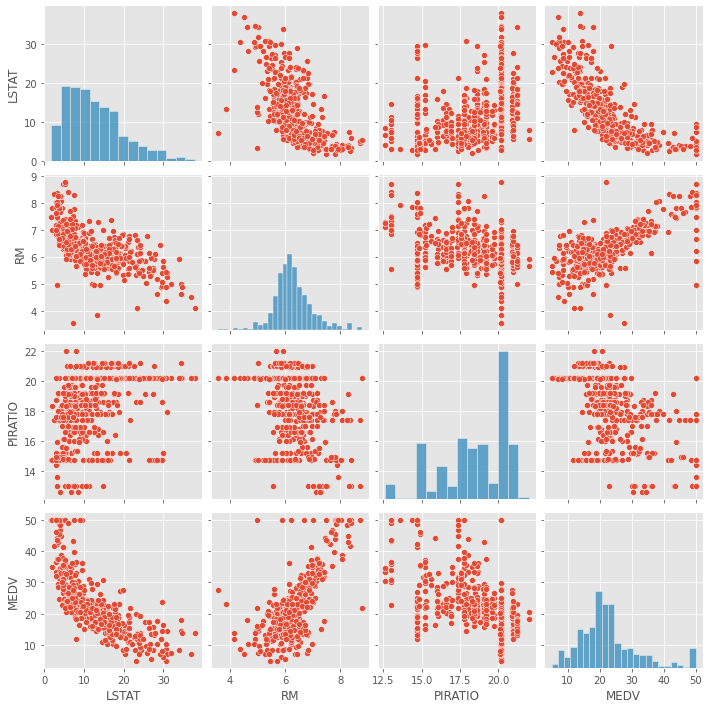

In [12]:
sns.pairplot(data[["LSTAT","RM","PIRATIO","MEDV"]]) # 因变量、自变量之间的关系

In [15]:
# 划分 
X ,y = data[data.columns.delete(-1)], data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
coef = linear_model.coef_#回归系数
line_pre = linear_model.predict(X_test)
print('SCORE:{:.4f}'.format(linear_model.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))
coef

SCORE:0.7559
RMSE:4.3708


array([-1.19007229e-01,  3.64055815e-02,  1.68552680e-02,  2.29397031e+00,
       -1.60706448e+01,  3.72371469e+00,  9.22765437e-03, -1.30674803e+00,
        3.43072685e-01, -1.45830386e-02, -9.73486692e-01,  7.89797436e-03,
       -5.72555056e-01])

In [18]:
df_coef = pd.DataFrame()
df_coef['Title'] = data.columns.delete(-1)
df_coef['Coef'] = coef
df_coef # 训练出来的系数？

,Title,Coef
0,CRIM,-0.119007
1,ZN,0.036406
2,INDUS,0.016855
3,CHAS,2.293970
4,NOX,-16.070645
5,RM,3.723715
6,AGE,0.009228
7,DIS,-1.306748
8,RAD,0.343073
9,TAX,-0.014583


<AxesSubplot:>

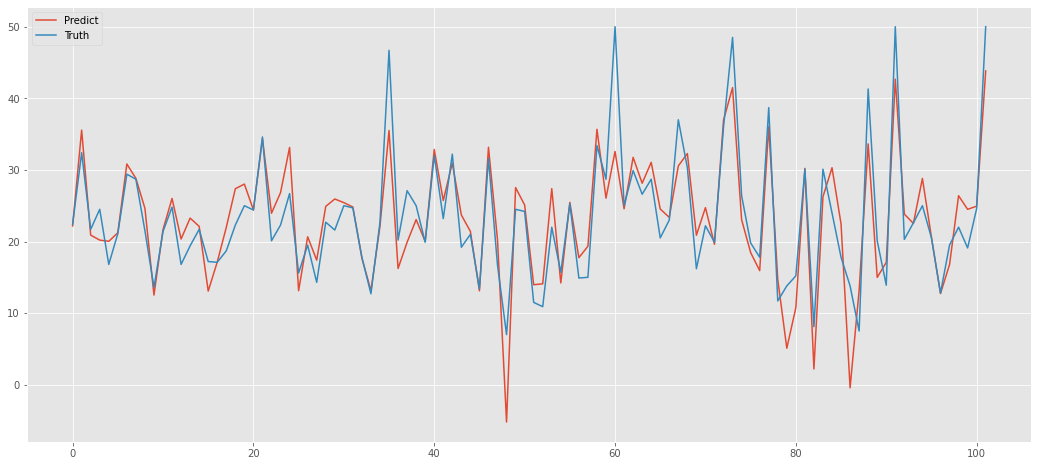

In [19]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = line_pre
hos_pre['Truth'] = y_test.reset_index(drop=True)
hos_pre.plot(figsize=(18,8))

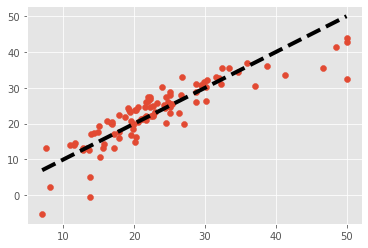

In [20]:
plt.scatter(y_test, line_pre,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')

In [16]:
# hos_pre = pd.DataFrame()
# hos_pre['Predict'] = line_pre
# hos_pre['Truth'] = y_test.reset_index(drop=True)
# hos_pre.plot(figsize=(18,10))

time: 304 µs


SCORE:0.7388
RMSE:4.6959


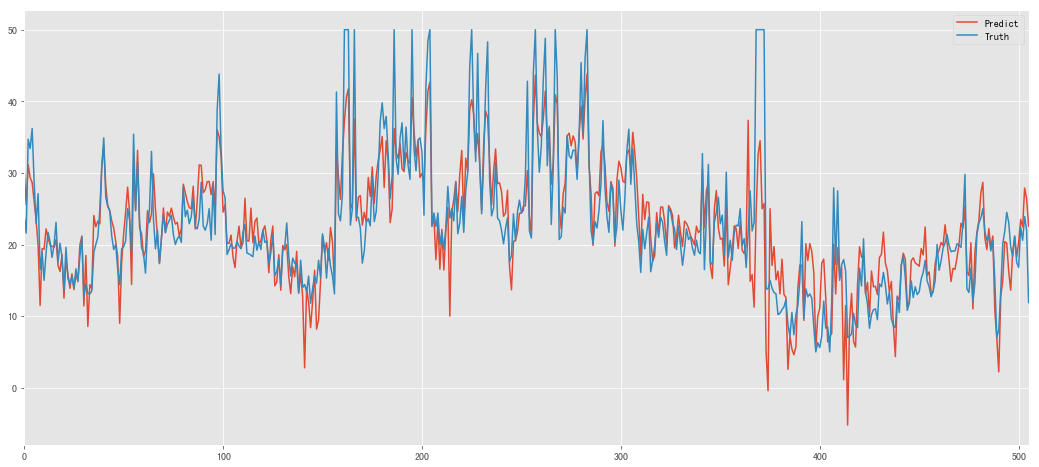

time: 381 ms


In [17]:
line_pre_all = linear_model.predict(X)  #预测值
print('SCORE:{:.4f}'.format(linear_model.score(X,y)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y, line_pre_all))))
hos_pre_all = pd.DataFrame()
hos_pre_all['Predict'] = line_pre_all
hos_pre_all['Truth'] = y
hos_pre_all.plot(figsize=(18,8))

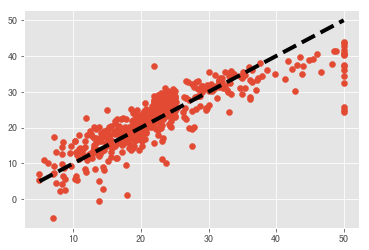

time: 166 ms


In [18]:
plt.scatter(y, line_pre_all,label='y')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4,label='predicted')

In [19]:
data.corr()['MEDV'].abs().sort_values(ascending=False).head(4)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PIRATIO    0.507787
Name: MEDV, dtype: float64

time: 4.82 ms


In [20]:
X2 = np.array(data[['LSTAT','RM','PIRATIO']])

time: 1.99 ms


In [21]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=888,test_size=0.2)

time: 23.2 ms


In [22]:
linear_model2 = LinearRegression()
linear_model2.fit(X2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

time: 4.36 ms


In [23]:
print(linear_model2.intercept_)
print(linear_model2.coef_)

19.593354785753203
[-0.61293552  4.37753037 -0.91466181]
time: 1.25 ms


In [24]:
line2_pre = linear_model2.predict(X2_test)  #预测值
print('SCORE:{:.4f}'.format(linear_model2.score(X2_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line2_pre))))#RMSE(标准误差)

SCORE:0.6736
RMSE:5.0540
time: 7.47 ms


In [25]:
line2_pre_all = linear_model2.predict(X2)  #预测值
print('SCORE:{:.4f}'.format(linear_model2.score(X2, y)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y, line2_pre_all))))#RMSE(标准误差)

SCORE:0.6779
RMSE:5.2145
time: 2.96 ms


In [341]:
X ,y = data[data.columns.delete(-1)], data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

time: 6.26 ms


In [342]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
X_train = ss_x.fit_transform(X_train)
X_test = ss_x.transform(X_test)
# ss_y = StandardScaler()
# y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
# y_test = ss_y.transform(y_test.values.reshape(-1, 1))

time: 6.21 ms


In [343]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()  
linreg.fit(X_train, y_train)  
line_pre = linreg.predict(X_test)  #预测值
print('SCORE:{:.4f}'.format(linreg.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))#RMSE(标准误差)

SCORE:0.7660
RMSE:4.8659
time: 5.34 ms


In [345]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
y_predict_lasso = lasso.predict(X_test)
r2_score_lasso = r2(y_test,y_predict_lasso)

print('SCORE:{:.4f}'.format( lasso.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_predict_lasso))))#RMSE(标准误差)
print('Lasso模型的R-squared值为:',r2_score_lasso)

SCORE:0.6534
RMSE:5.9220
Lasso模型的R-squared值为: 0.6534139532075762
time: 4.42 ms


In [344]:
enet = ElasticNet()
enet.fit(X_train,y_train)
y_predict_enet = enet.predict(X_test)
r2_score_enet = r2(y_test,y_predict_enet)

print('SCORE:{:.4f}'.format( enet.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_predict_enet))))#RMSE(标准误差)
print("ElasticNet模型的R-squared值为:",r2_score_enet)

SCORE:0.6407
RMSE:6.0300
ElasticNet模型的R-squared值为: 0.640657078461146
time: 6.37 ms


In [352]:
from sklearn import ensemble
#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,'learning_rate': 0.01, 'loss': 'ls'}
#clf = ensemble.GradientBoostingRegressor(**params)
clf = ensemble.GradientBoostingRegressor()
clf.fit(X_train, y_train)
clf_pre=clf.predict(X_test) #预测值
print('SCORE:{:.4f}'.format(clf.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, clf_pre))))#RMSE(标准误差)

SCORE:0.8982
RMSE:0.3585
time: 122 ms


/home/jovyan/.virtualenvs/basenv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [346]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae

def svr_model(kernel):
    svr = SVR(kernel=kernel) 
    svr.fit(X_train, y_train)
    y_predict = svr.predict(X_test)

    # score(): Returns the coefficient of determination R^2 of the prediction.
    print(kernel,' SVR的默认衡量评估值值为：', svr.score(X_test,y_test))
    print(kernel,' SVR的R-squared值为：', r2(y_test, y_predict))
    print(kernel,' SVR的均方误差（mean squared error）为：',mse(y_test, y_predict))
    print(kernel,' SVR的平均绝对误差（mean absolute error）为：',mae(y_test,y_predict))
    # print(kernel,' SVR的均方误差（mean squared error）为：',mse(scalery.inverse_transform(y_test), scalery.inverse_transform(y_predict)))
    # print(kernel,' SVR的平均绝对误差（mean absolute error）为：',mae(scalery.inverse_transform(y_test),scalery.inverse_transform(y_predict)))
    
    return svr

time: 820 µs


In [347]:
linear_svr = svr_model(kernel='linear') 

linear  SVR的默认衡量评估值值为： 0.7176131133299808
linear  SVR的R-squared值为： 0.7176131133299808
linear  SVR的均方误差（mean squared error）为： 28.57387137032659
linear  SVR的平均绝对误差（mean absolute error）为： 3.4543994016765205
time: 25.8 ms


In [348]:
poly_svr = svr_model(kernel='poly')  

poly  SVR的默认衡量评估值值为： 0.6891189621773669
poly  SVR的R-squared值为： 0.6891189621773669
poly  SVR的均方误差（mean squared error）为： 31.457107980363826
poly  SVR的平均绝对误差（mean absolute error）为： 3.6952660885288173
time: 24.7 ms


In [349]:
rbf_svr = svr_model(kernel='rbf') 
train_score = rbf_svr.score(X_train, y_train)
test_score = rbf_svr.score(X_test, y_test)
train_score, test_score

rbf  SVR的默认衡量评估值值为： 0.661640033892664
rbf  SVR的R-squared值为： 0.661640033892664
rbf  SVR的均方误差（mean squared error）为： 34.2376172719268
rbf  SVR的平均绝对误差（mean absolute error）为： 3.3921351911109707


(0.6598289983439701, 0.661640033892664)

time: 32.1 ms


In [334]:
from sklearn.svm import SVR
linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)
linear_svr_pre = linear_svr.predict(X_test)#预测值
print('SCORE:{:.4f}'.format(linear_svr.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, linear_svr_pre))))#RMSE(标准误差)

SCORE:0.7176
RMSE:5.3455
time: 26.6 ms


In [350]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
X_train = ss_x.fit_transform(X_train)
X_test = ss_x.transform(X_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = ss_y.transform(y_test.values.reshape(-1, 1))

time: 2.68 ms


In [351]:
poly_svr = SVR(kernel="poly")
poly_svr.fit(X_train, y_train)
poly_svr_pre = poly_svr.predict(X_test)#预测值
print('SCORE:{:.4f}'.format(poly_svr.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, poly_svr_pre))))#RMSE(标准误差)

SCORE:0.8504
RMSE:0.4345
time: 28.2 ms


/home/jovyan/.virtualenvs/basenv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [337]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)
tree_reg_pre = tree_reg.predict(X_test)#预测值
print('SCORE:{:.4f}'.format( tree_reg.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,tree_reg_pre))))#RMSE(标准误差)

SCORE:0.7184
RMSE:0.5961
time: 3.33 ms


In [338]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=888) 

time: 2.87 ms


In [339]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
X_train = ss_x.fit_transform(X_train)
X_test = ss_x.transform(X_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = ss_y.transform(y_test.values.reshape(-1, 1))

time: 7.81 ms


In [323]:
from sklearn.preprocessing import MinMaxScaler

# 2. 标准化数据
scalerX = StandardScaler() # 
scalerX.fit(X_train)       # 使用training data的标准差进行标准化

X_train = scalerX.transform(X_train) # 对训练集特征进行标准化
X_test = scalerX.transform(X_test)   # 对测试机特征进行标准化

time: 4.37 ms


In [324]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae

time: 754 µs


In [325]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
y_predict_lasso = lasso.predict(X_test)
r2_score_lasso = r2(y_test,y_predict_lasso)

print('SCORE:{:.4f}'.format( lasso.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_predict_lasso))))#RMSE(标准误差)
print('Lasso模型的R-squared值为:',r2_score_lasso)

SCORE:0.6714
RMSE:5.0708
Lasso模型的R-squared值为: 0.6714452830544647
time: 4.15 ms


In [213]:
enet = ElasticNet()
enet.fit(X_train,y_train)
y_predict_enet = enet.predict(X_test)
r2_score_enet = r2(y_test,y_predict_enet)

print('SCORE:{:.4f}'.format( enet.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_predict_enet))))#RMSE(标准误差)
print("ElasticNet模型的R-squared值为:",r2_score_enet)

SCORE:0.6765
RMSE:5.0318
ElasticNet模型的R-squared值为: 0.6764714123859652
time: 3.45 ms


In [214]:
def svr_model(kernel):
    svr = SVR(kernel=kernel) 
    svr.fit(X_train, y_train.ravel())
    y_predict = svr.predict(X_test)

    # score(): Returns the coefficient of determination R^2 of the prediction.
    print(kernel,' SVR的默认衡量评估值值为：', svr.score(X_test,y_test.ravel()))
    print(kernel,' SVR的R-squared值为：', r2(y_test, y_predict))
    print(kernel,' SVR的均方误差（mean squared error）为：',mse(y_test, y_predict))
    print(kernel,' SVR的平均绝对误差（mean absolute error）为：',mae(y_test,y_predict))
    # print(kernel,' SVR的均方误差（mean squared error）为：',mse(scalery.inverse_transform(y_test), scalery.inverse_transform(y_predict)))
    # print(kernel,' SVR的平均绝对误差（mean absolute error）为：',mae(scalery.inverse_transform(y_test),scalery.inverse_transform(y_predict)))
    
    return svr

time: 607 µs


In [215]:
linear_svr = svr_model(kernel='linear') 

linear  SVR的默认衡量评估值值为： 0.7312203799751689
linear  SVR的R-squared值为： 0.7312203799751689
linear  SVR的均方误差（mean squared error）为： 21.034794333434576
linear  SVR的平均绝对误差（mean absolute error）为： 2.962973710563484
time: 28 ms


In [216]:
poly_svr = svr_model(kernel='poly')  

poly  SVR的默认衡量评估值值为： 0.6431164672796643
poly  SVR的R-squared值为： 0.6431164672796643
poly  SVR的均方误差（mean squared error）为： 27.929839736615065
poly  SVR的平均绝对误差（mean absolute error）为： 3.242978906566256
time: 20 ms


In [217]:
rbf_svr = svr_model(kernel='rbf') 
train_score = rbf_svr.score(X_train, y_train)
test_score = rbf_svr.score(X_test, y_test)
train_score, test_score

rbf  SVR的默认衡量评估值值为： 0.6026809154459405
rbf  SVR的R-squared值为： 0.6026809154459405
rbf  SVR的均方误差（mean squared error）为： 31.094341258355197
rbf  SVR的平均绝对误差（mean absolute error）为： 3.147440764610918


(0.6802258566213472, 0.6026809154459405)

time: 49.9 ms


In [218]:
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

# 均方误差(MSE)作为损失函数，评估监测指标为平均绝对误差(MAE)
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae']) 
# verbose=0 不显示每个epochs的训练过程在输出cell中
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=0)

time: 6.21 s


In [219]:
r2_score_nn = r2(y_test, model.predict(X_test))
mse_score_nn, mae_score_nn = model.evaluate(X_test, y_test, verbose = 0)
print('神经网络模型的R-Squared值为',r2_score_nn)
print("均方误差MSE:",mse_score_nn,"\n平均绝对误差MAE：", mae_score_nn)

神经网络模型的R-Squared值为 0.890323646181461
均方误差MSE: 8.58331298828125 
平均绝对误差MAE： 2.2752952575683594
time: 114 ms


In [220]:
from sklearn.datasets import load_boston
dir(load_boston())

['DESCR', 'data', 'feature_names', 'filename', 'target']

time: 6.17 ms


In [221]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [222]:
X = load_boston().data
y = load_boston().target

time: 8.22 ms


In [223]:
df = pd.DataFrame(X, columns=load_boston().feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


time: 19.8 ms


In [224]:
df['MEDV'] = y
df.head()
type(df)

pandas.core.frame.DataFrame

time: 2.71 ms


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
time: 5.21 ms


In [226]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


time: 72 ms


In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


time: 42.7 ms


In [228]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


time: 15.5 ms


In [229]:
df.corr()['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

time: 4.56 ms


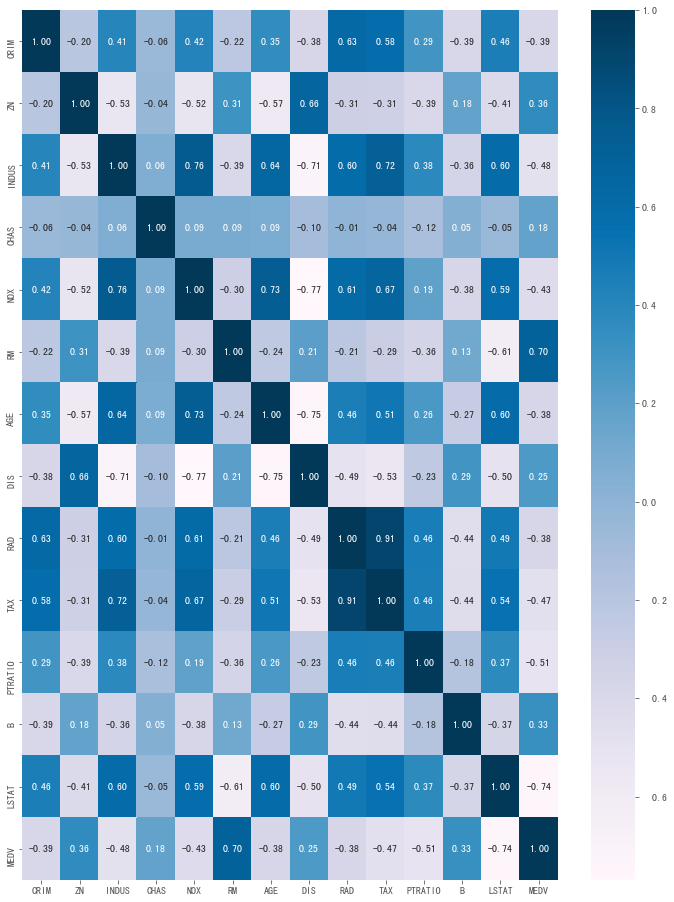

time: 1.05 s


In [230]:
plt.figure(figsize=(12,16))
sns.heatmap(df.corr(), annot=True , fmt='.2f', cmap='PuBu')

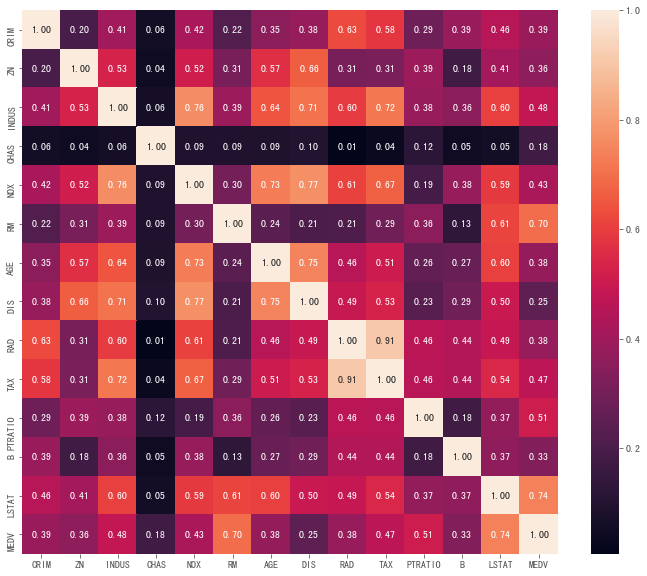

time: 918 ms


In [231]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().abs(),annot=True,fmt='.2f')

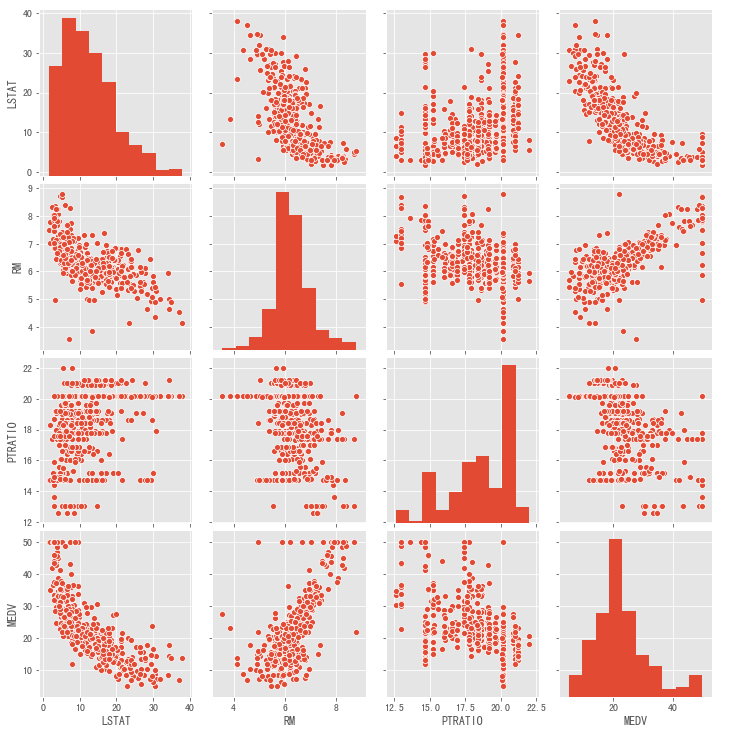

time: 1.97 s


In [232]:
sns.pairplot(df[["LSTAT","RM","PTRATIO","MEDV"]])

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)

time: 1.46 ms


In [234]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)
time: 8.82 ms


In [235]:
linreg = LinearRegression()  #建立模型
linreg.fit(X_train, y_train)  #训练模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

time: 4.01 ms


In [236]:
print(linreg.intercept_)
print(linreg.coef_)

42.93352585337652
[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]
time: 4.43 ms


In [237]:
df_coef = pd.DataFrame()
df_coef['Title1'] = df.columns.delete(-1)
df_coef['Title2']= load_boston().feature_names
df_coef['Coef'] = linreg.coef_
df_coef

,Title1,Title2,Coef
0,CRIM,CRIM,-0.112387
1,ZN,ZN,0.058059
2,INDUS,INDUS,0.018359
3,CHAS,CHAS,2.129978
4,NOX,NOX,-19.581101
5,RM,RM,3.095462
6,AGE,AGE,0.004453
7,DIS,DIS,-1.500476
8,RAD,RAD,0.305359
9,TAX,TAX,-0.011123


time: 16.8 ms


In [238]:
line_pre = linreg.predict(X_test)  #预测值
print('SCORE:{:.4f}'.format(linreg.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))#RMSE(标准误差)

SCORE:0.7634
RMSE:4.8354
time: 2.22 ms


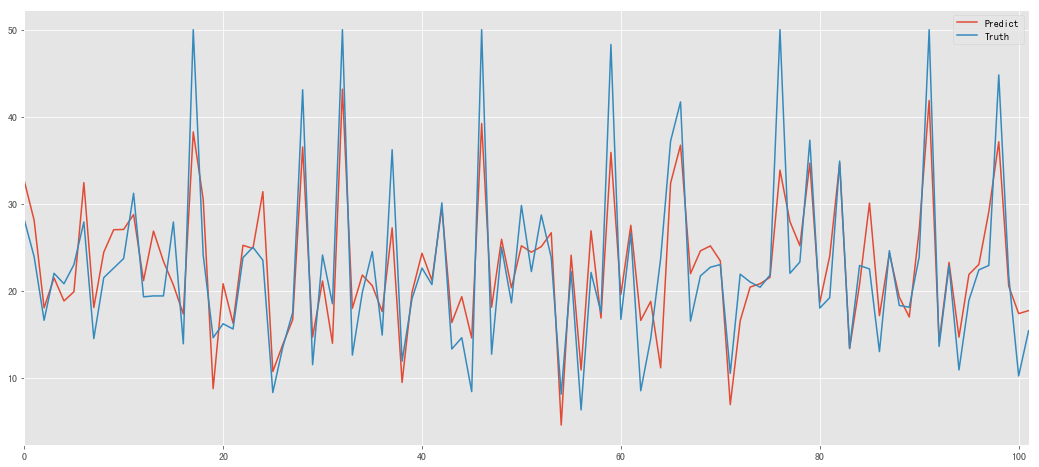

time: 350 ms


In [239]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = line_pre
hos_pre['Truth'] = y_test
hos_pre.plot(figsize=(18,8))

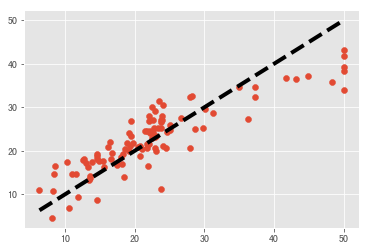

time: 151 ms


In [240]:
plt.scatter(y_test, line_pre,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')

In [241]:
line_pre_all = linreg.predict(X)  #预测值
print('SCORE:{:.4f}'.format(linreg.score(X,y)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y, line_pre_all))))

SCORE:0.7374
RMSE:4.7084
time: 2.34 ms


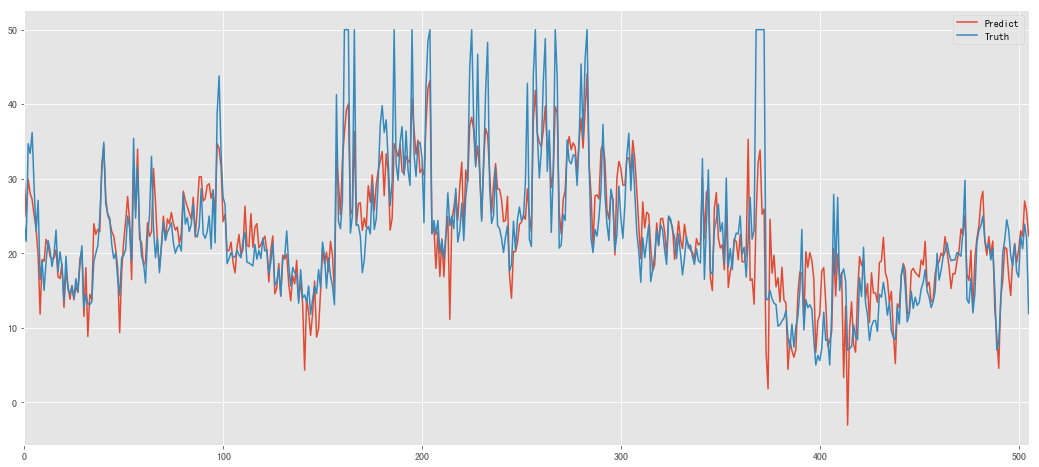

time: 357 ms


In [242]:
hos_pre_all = pd.DataFrame()
hos_pre_all['Predict'] = line_pre_all
hos_pre_all['Truth'] = y
hos_pre_all.plot(figsize=(18,8))

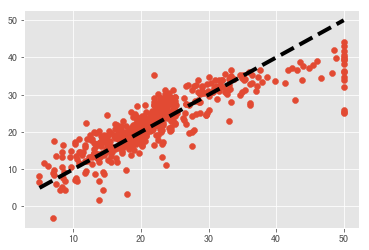

time: 161 ms


In [243]:
plt.scatter(y, line_pre_all,label='y')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4,label='predicted')
# 模型在整个数据集中的评分比在测试集中要低

In [244]:
df.corr()['MEDV'].abs().sort_values(ascending=False).head(4)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
Name: MEDV, dtype: float64

time: 4.89 ms


In [245]:
X2=np.array(df[["LSTAT","RM","PTRATIO"]])

time: 5.51 ms


In [246]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=1,test_size=0.2)

time: 989 µs


In [247]:
linreg2 = LinearRegression()  #建立模型
linreg2.fit(X2_train, y_train)  #训练模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

time: 11.3 ms


In [248]:
print(linreg2.intercept_)
print(linreg2.coef_)

24.11283845164493
[-0.59061956  3.81700007 -0.97465491]
time: 1.06 ms


In [249]:
line2_pre = linreg2.predict(X2_test)  #预测值
print('SCORE:{:.4f}'.format(linreg2.score(X2_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line2_pre))))#RMSE(标准误差)

SCORE:0.6959
RMSE:5.4820
time: 5.35 ms


In [250]:
line2_pre_all = linreg2.predict(X2)  #预测值
print('SCORE:{:.4f}'.format(linreg2.score(X2, y)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y, line2_pre_all))))#RMSE(标准误差)

SCORE:0.6766
RMSE:5.2254
time: 3.96 ms
